# Sperm whale codas

In this example we'll do some statistics on [sperm whale codas](https://doi.org/10.1111/2041-210X.13644).

# Importing packages

In [1]:
from thebeat import Sequence, Stimulus, StimSequence
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
# We suppress warnings, but let's hide that to avoid confusion
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing the data

In [3]:
df = pd.read_csv('hersh_spermwhales_2008.csv')

In [4]:
df.head(5)

,codanum,ioi_i,ioi
0,DSWP11,1,0.063
1,DSWP11,2,0.062
2,DSWP11,3,0.083
3,DSWP12,1,0.090
4,DSWP12,2,0.077


We will loop over the unique coda numbers, and create a Sequence object for each number with name ``codanum``.

In [5]:
# Create an empty list in which to store the Sequence objects
codas = []

# Loop over the coda numbers, get their IOIs and make a Sequence object from them
for codanum in df.codanum.unique():
    iois = df[df['codanum'] == codanum].ioi.values
    codas.append(Sequence(iois=iois, name=codanum))

Let's make a histogram of the interval ratios.

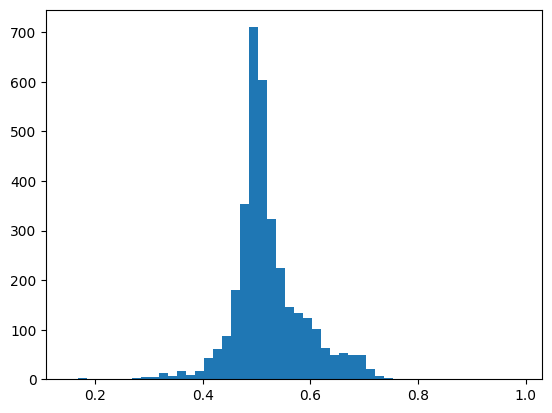

In [6]:
ratios = np.concatenate([coda.interval_ratios_from_dyads for coda in codas])

plt.hist(ratios, bins=50);

Plot one of them:

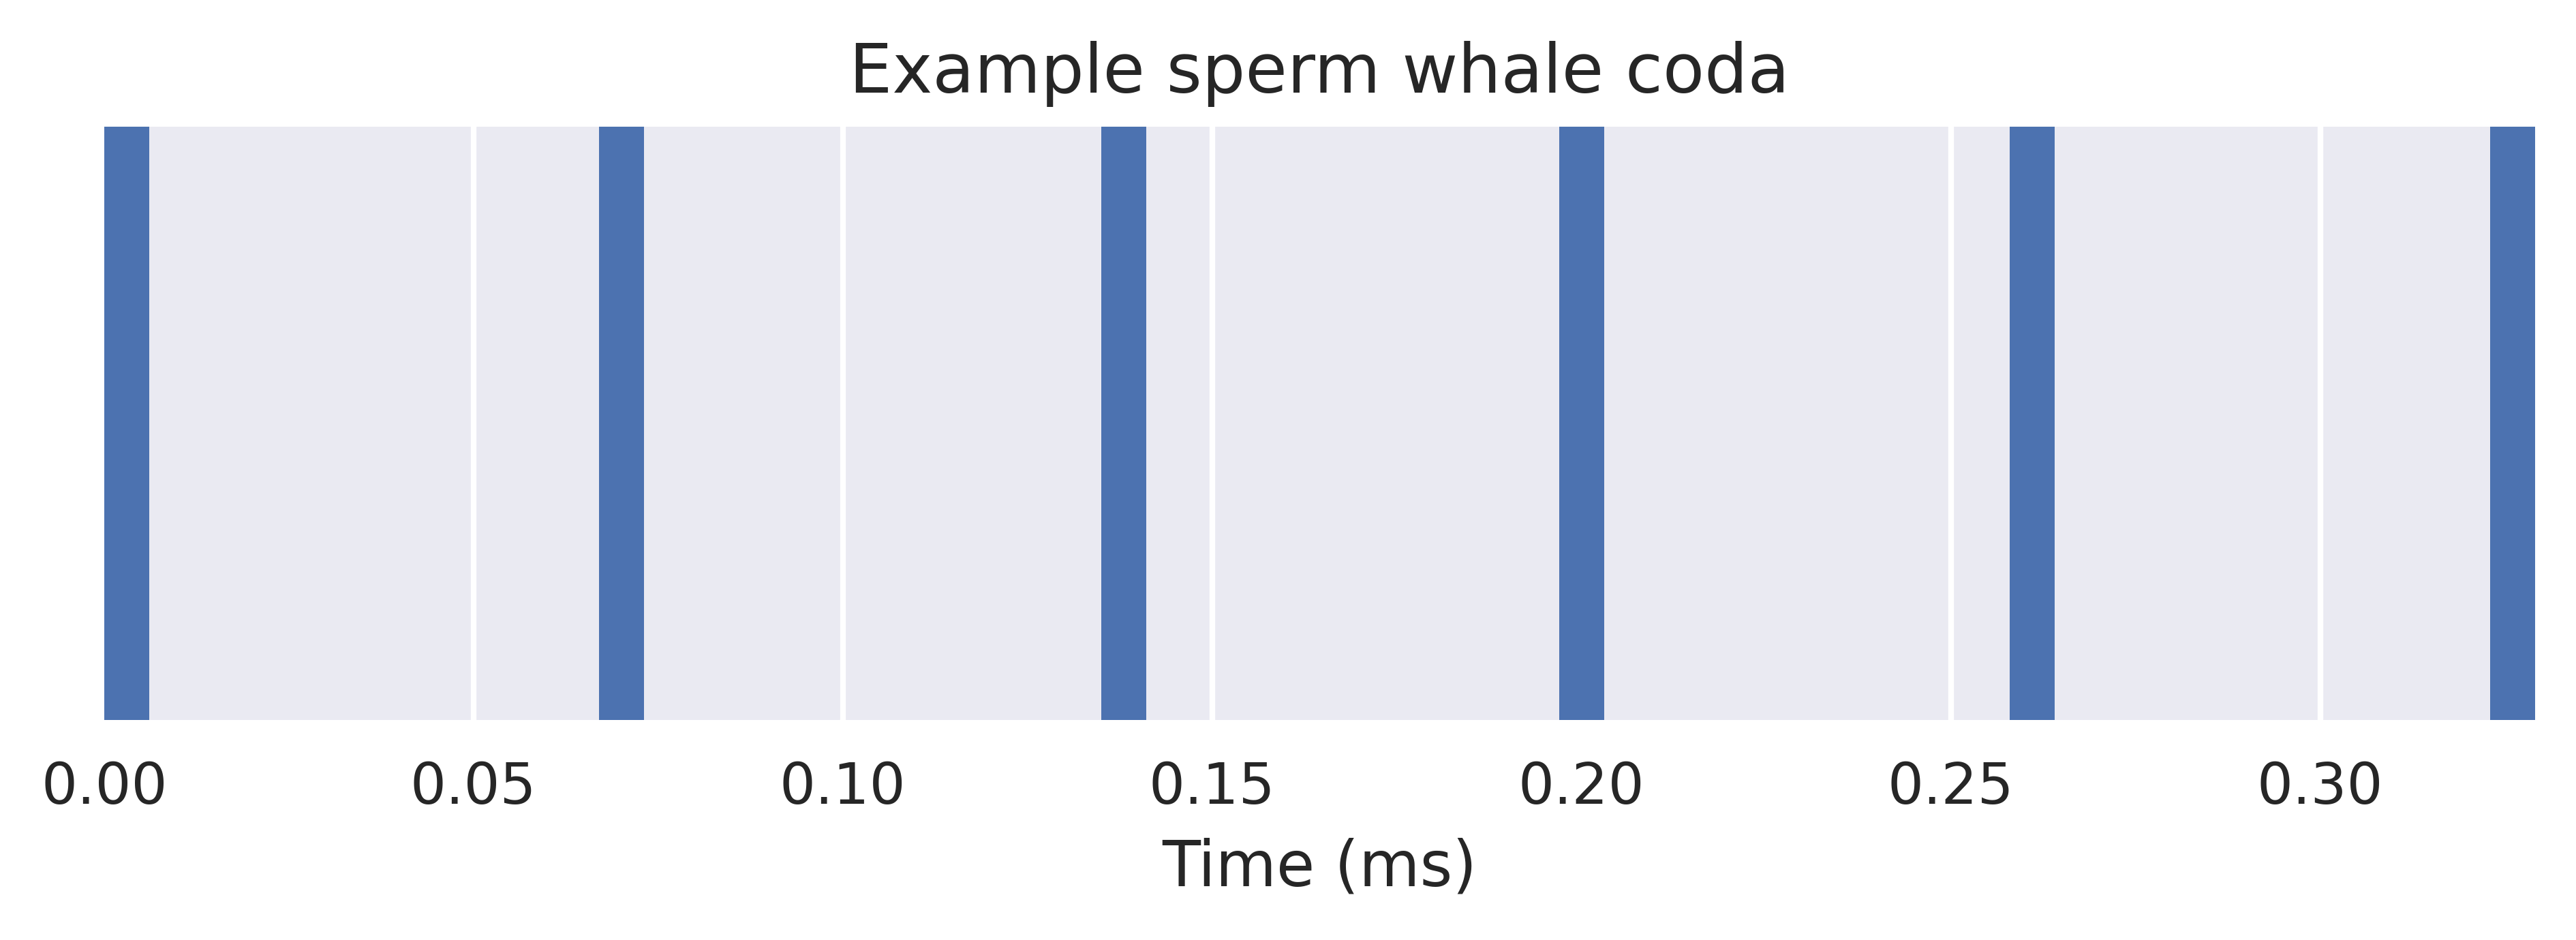

In [7]:
fig, ax = codas[4].plot_sequence(x_axis_label = "Time (ms)", title="Example sperm whale coda", dpi=600);
fig.savefig('example_spermwhale.png')

In [8]:
stim = Stimulus.generate(offramp_ms=2)
trial = StimSequence(stim, codas[10], sequence_time_unit="s")
trial.play()

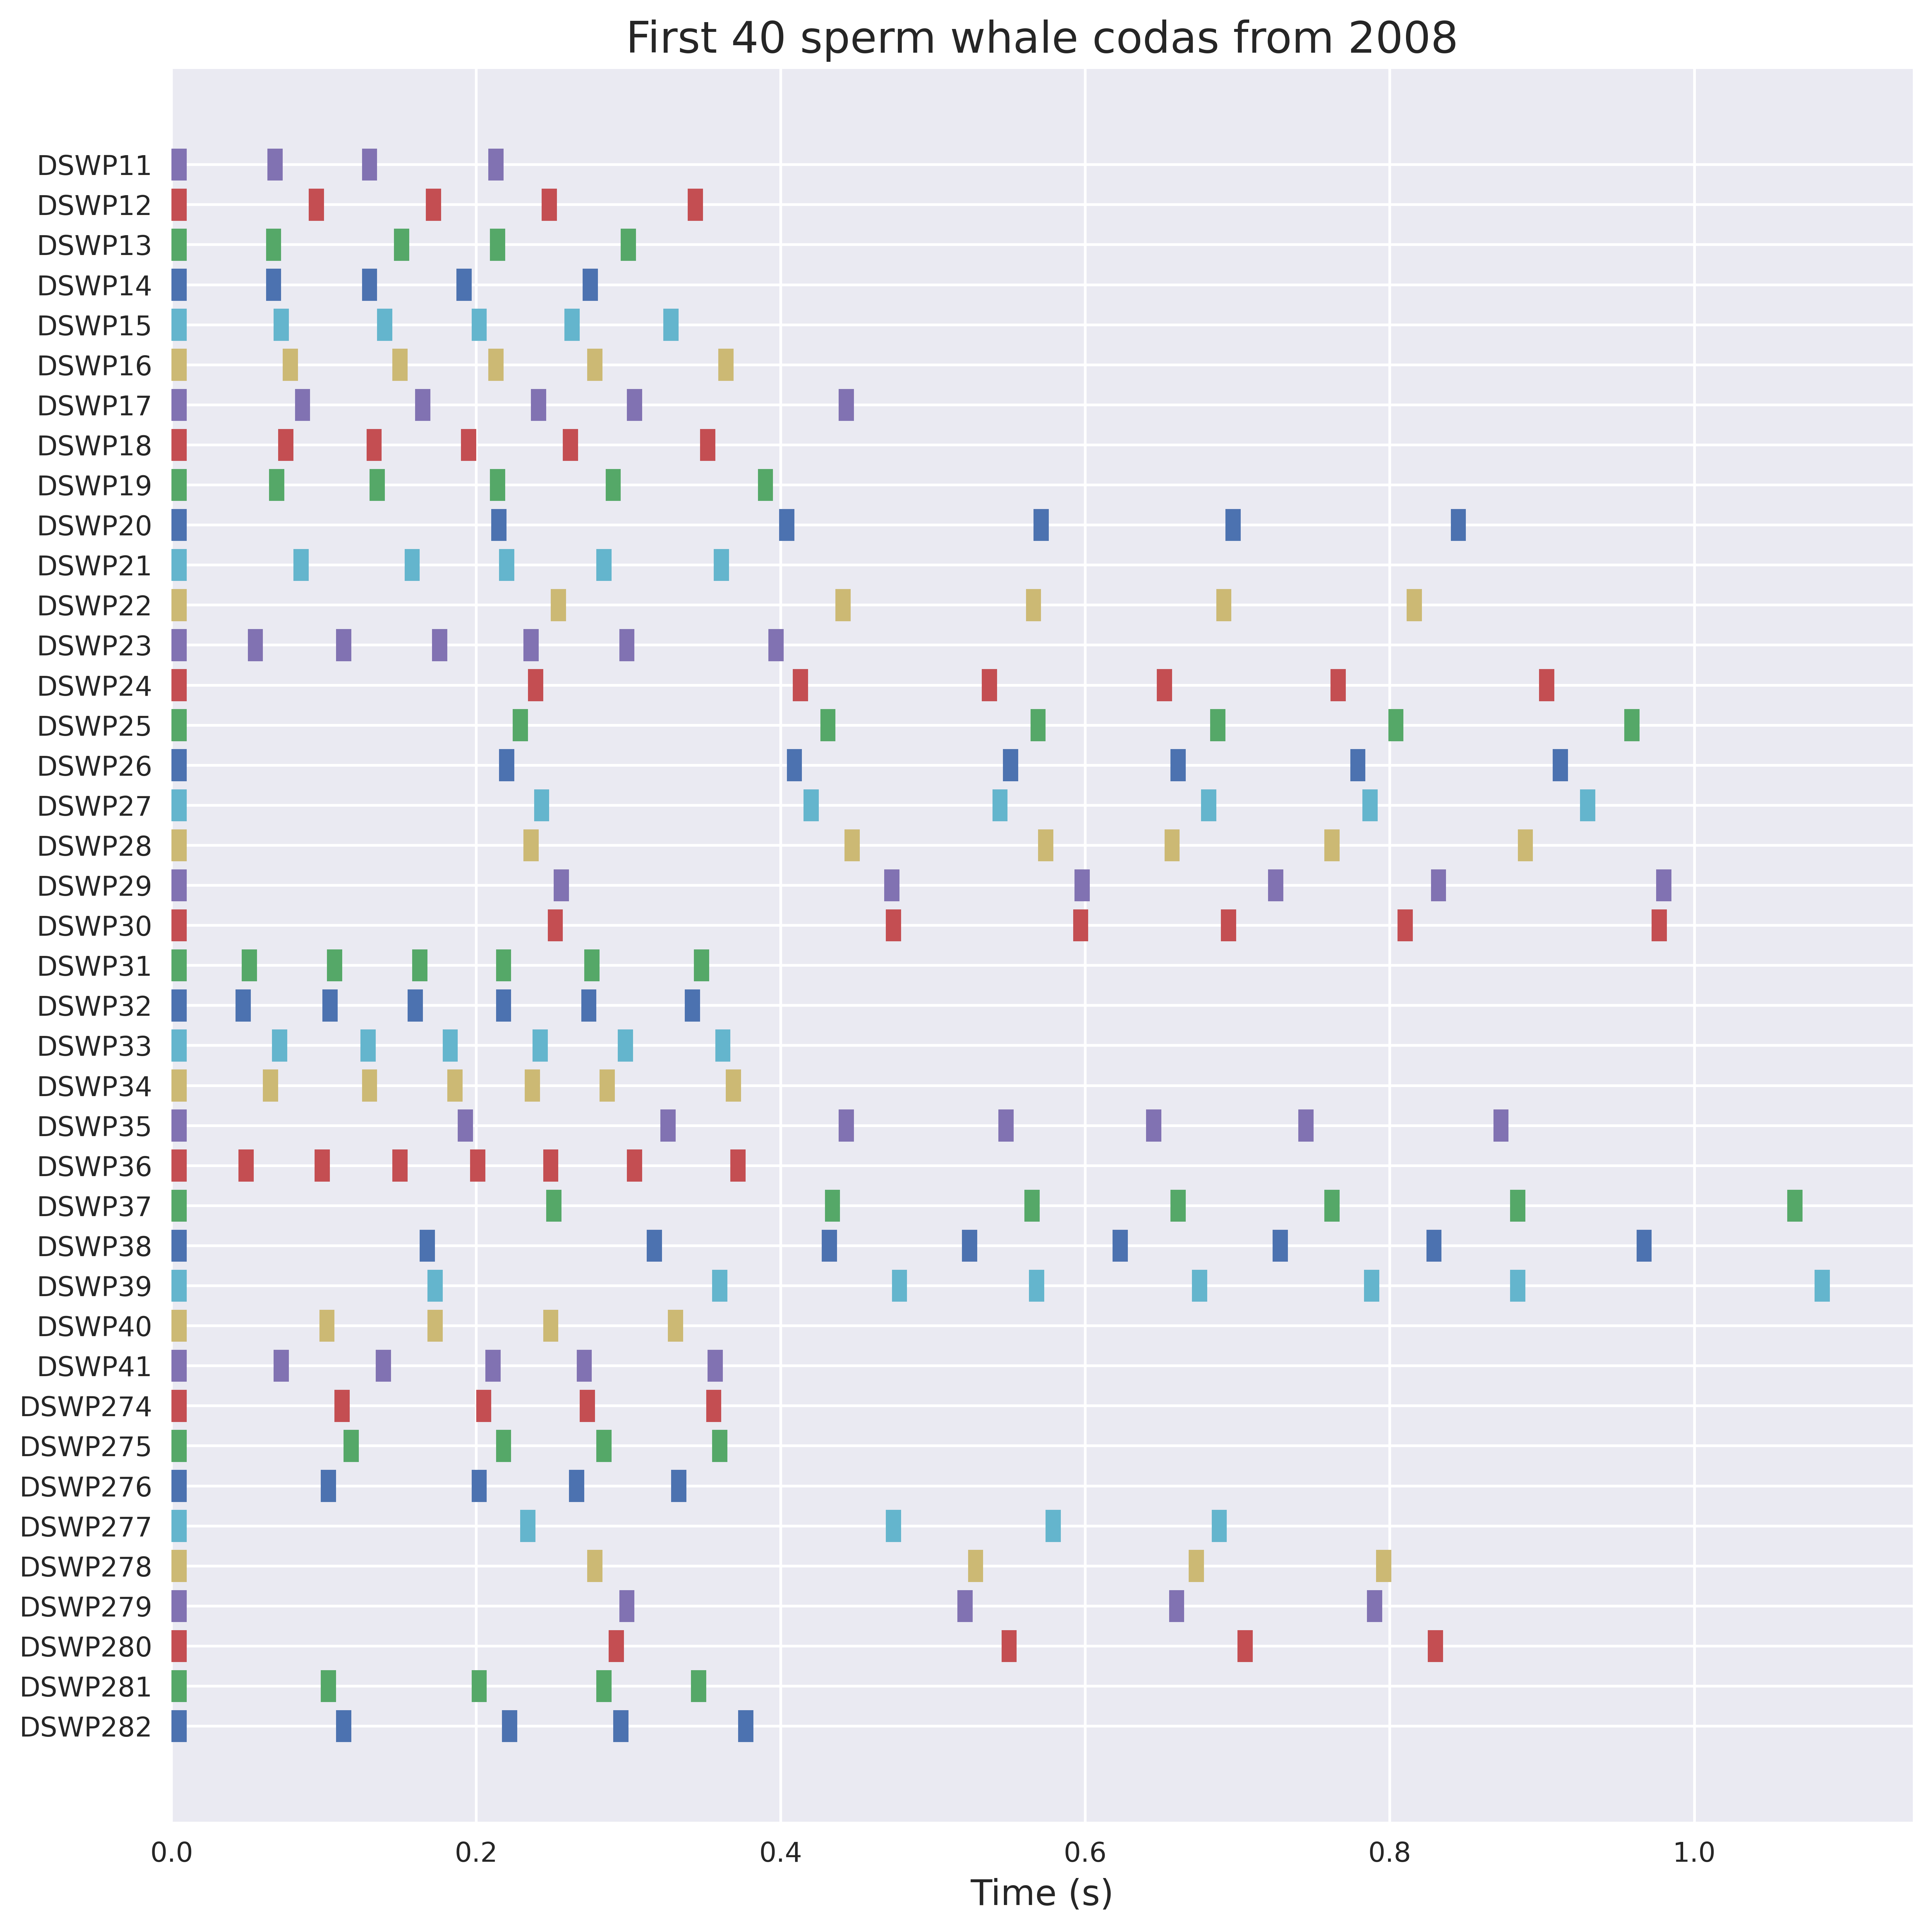

In [9]:
from thebeat.visualization import plot_multiple_sequences

fig, ax = plot_multiple_sequences(codas[:40], 
  linewidths=0.01, 
  figsize=(10, 10), 
  x_axis_label="Time (s)", dpi=600)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title(label='First 40 sperm whale codas from 2008', fontdict = {'fontsize': 16})
ax.set_xlabel("Time (s)", fontsize=13)

fig.savefig('sperm_whale_codas_multiple.pdf')

In [10]:
# Recurrence plot

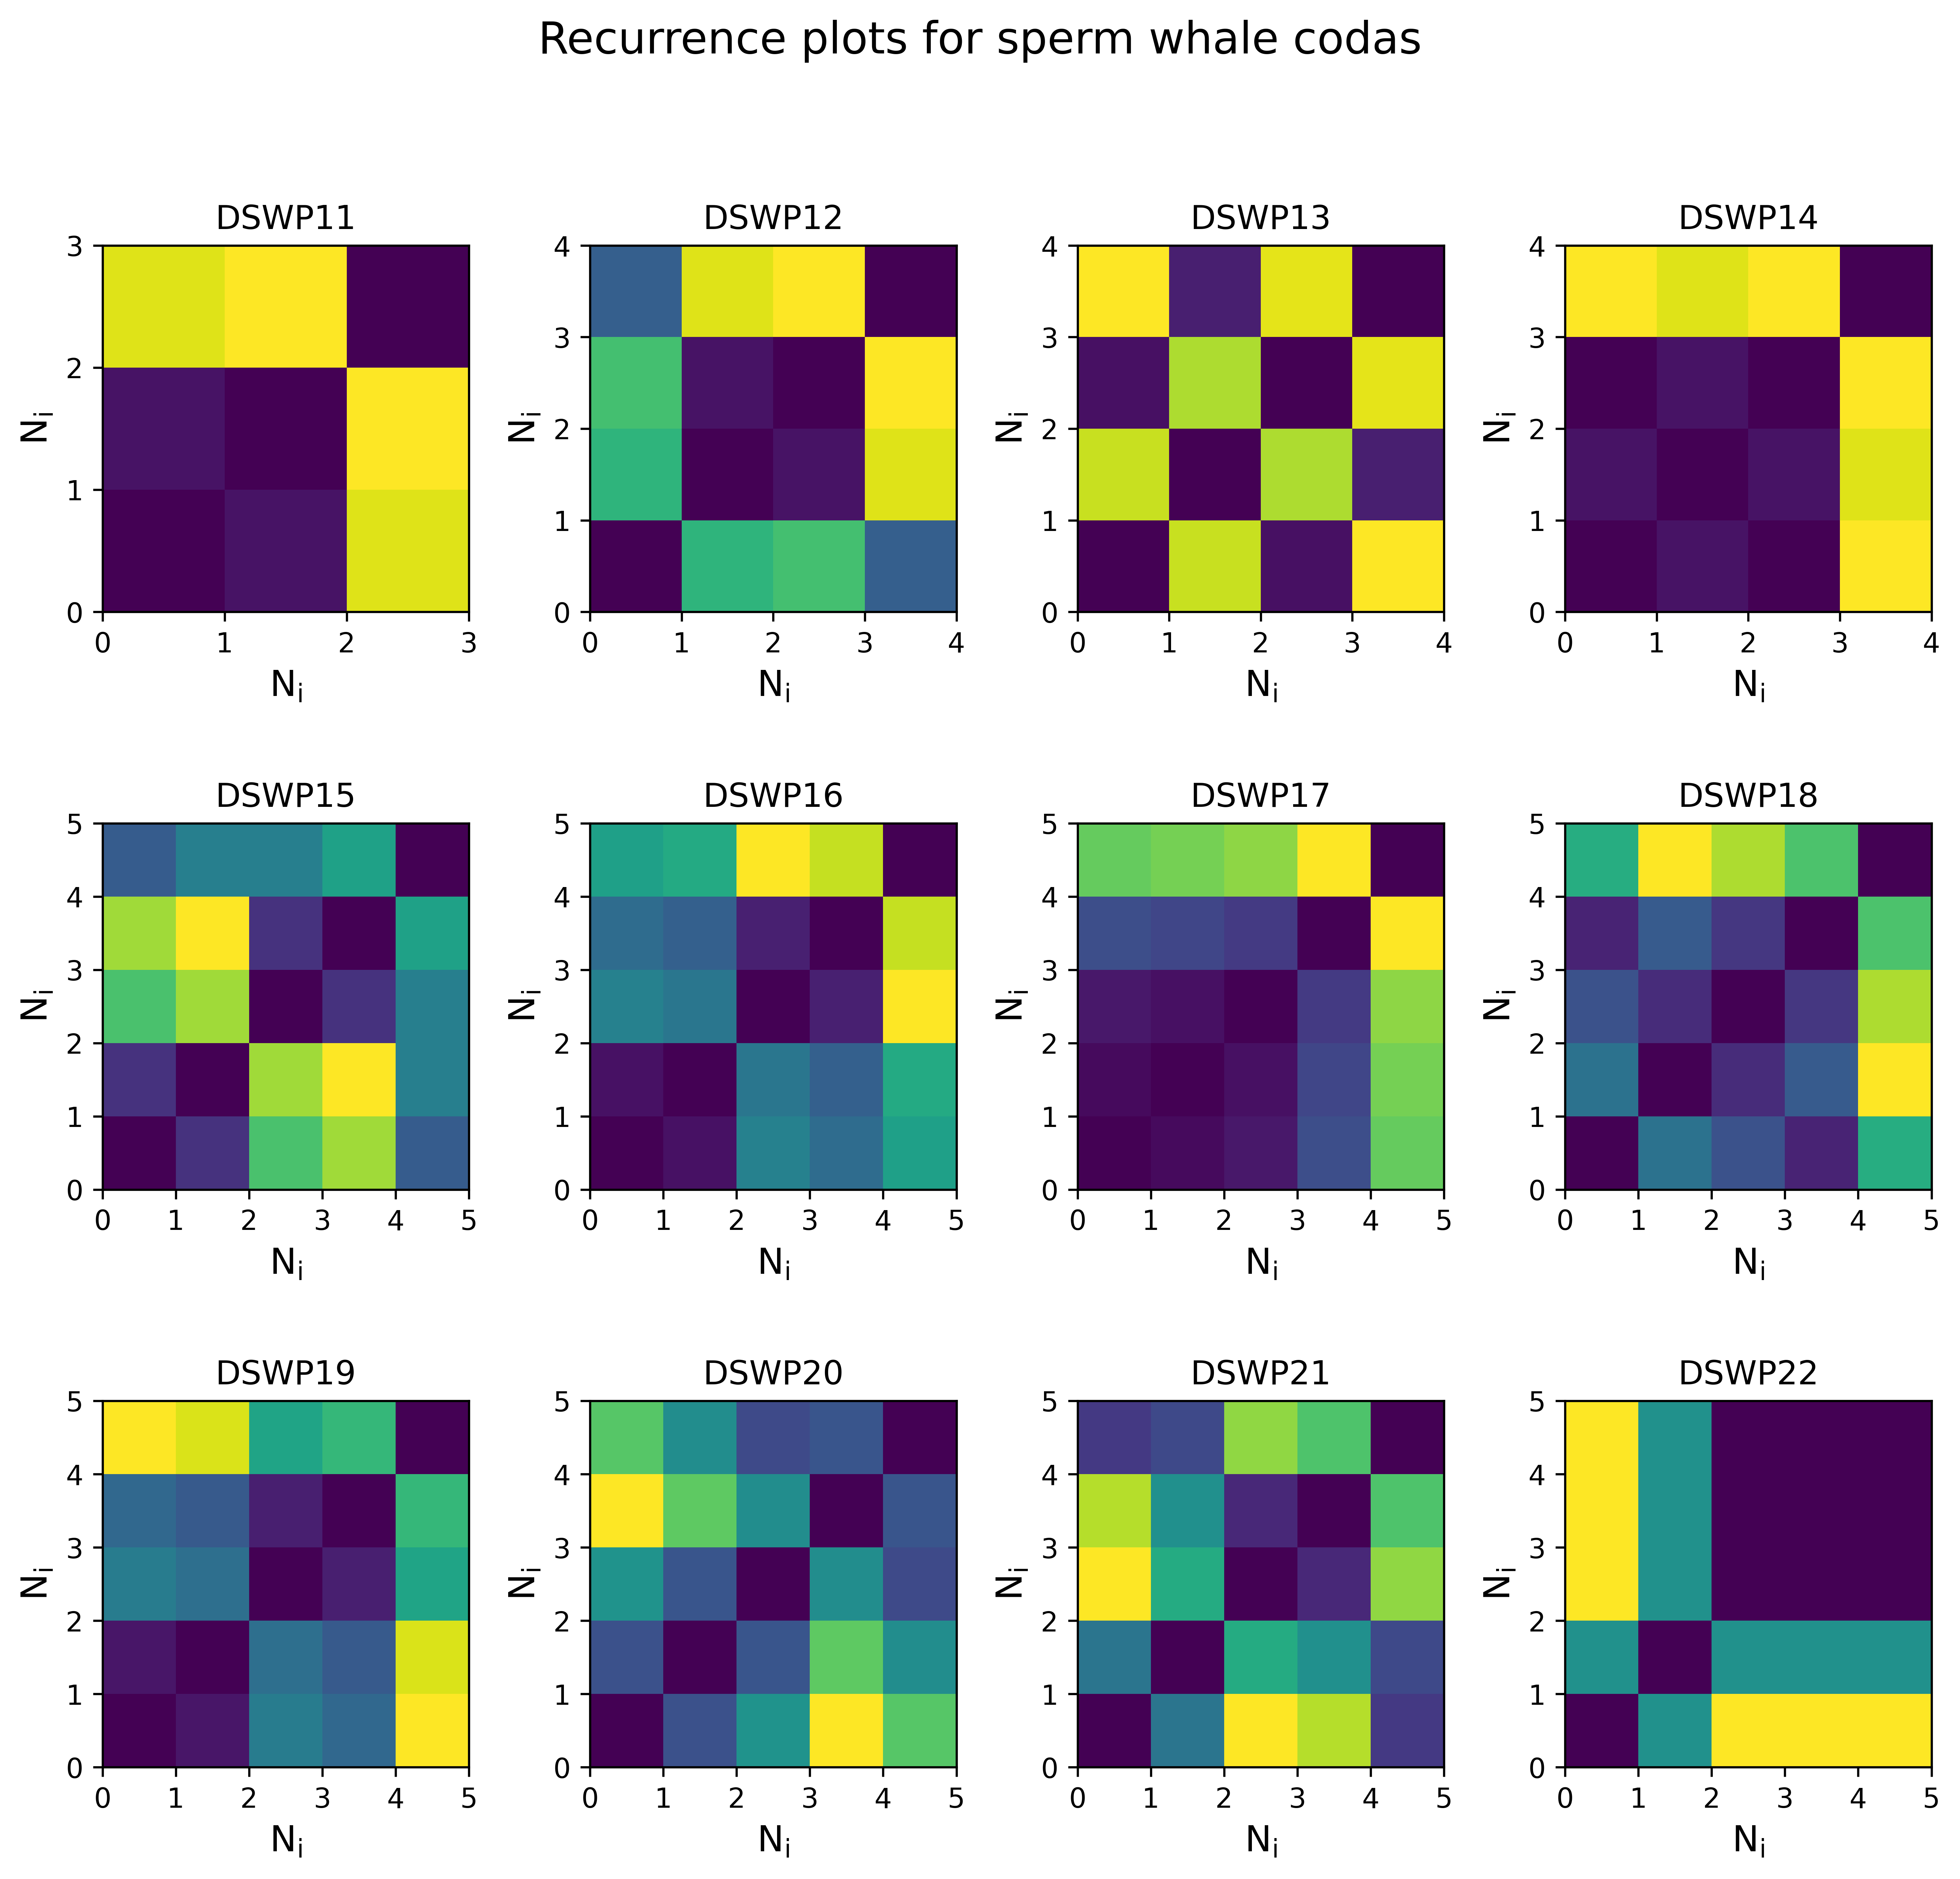

In [11]:
from thebeat.visualization import recurrence_plot

fig, axs = plt.subplots(3, 4, tight_layout=True, figsize=(10, 10), dpi=600)

for i, coda in enumerate(codas[:12]):
    recurrence_plot(coda, ax=axs[i // 4, i % 4], suppress_display=True)
    axs[i // 4, i % 4].tick_params(axis='both', which='major', labelsize=10)
    axs[i // 4, i % 4].set_xlabel(r"$\mathregular{N_i}$", fontsize=13)
    axs[i // 4, i % 4].set_ylabel(r"$\mathregular{N_i}$", fontsize=13)
    
fig.suptitle('Recurrence plots for sperm whale codas', fontsize=16)
fig.savefig('recurrence_plots.pdf')

We find the beat using autocorrelations, calculate the nPVI, and plot a circular histogram

In [13]:
from thebeat.stats import get_npvi
from thebeat.visualization import plot_phase_differences
from thebeat.stats import acf_plot

dswp17 = codas[6]
acf_plot(dswp17, resolution=0.001)

ValueError: max() arg is an empty sequence